In [1]:
#Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.preprocessing import OrdinalEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/aishwaryamate/Datasets/main/cars.csv')
df

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,sedan,rwd,front,68.9,55.5,ohc,141,114,23,28,16845
201,-1,95,volvo,gas,sedan,rwd,front,68.8,55.5,ohc,141,160,19,25,19045
202,-1,95,volvo,gas,sedan,rwd,front,68.9,55.5,ohcv,173,134,18,23,21485
203,-1,95,volvo,diesel,sedan,rwd,front,68.9,55.5,ohc,145,106,26,27,22470


# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    object 
 10  engine-size        205 non-null    int64  
 11  horsepower         205 non-null    object 
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    int64  
dtypes: float64(2), int64(5), object(8)
memory usage: 24.1+ KB


In [4]:
df.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
body-style           0
drive-wheels         0
engine-location      0
width                0
height               0
engine-type          0
engine-size          0
horsepower           0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [5]:
df['normalized-losses'].value_counts()

?      41
161    11
91      8
150     7
134     6
128     6
104     6
85      5
94      5
65      5
102     5
74      5
168     5
103     5
95      5
106     4
93      4
118     4
148     4
122     4
83      3
125     3
154     3
115     3
137     3
101     3
119     2
87      2
89      2
192     2
197     2
158     2
81      2
188     2
194     2
153     2
129     2
108     2
110     2
164     2
145     2
113     2
256     1
107     1
90      1
231     1
142     1
121     1
78      1
98      1
186     1
77      1
Name: normalized-losses, dtype: int64

In [6]:
df[df['horsepower']=='?']

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
130,0,?,renault,gas,wagon,fwd,front,66.5,55.2,ohc,132,?,23,31,9295
131,2,?,renault,gas,hatchback,fwd,front,66.6,50.5,ohc,132,?,23,31,9895


In [7]:
df.replace('?', np.nan, inplace=True)

In [8]:
df.isna().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
body-style            0
drive-wheels          0
engine-location       0
width                 0
height                0
engine-type           0
engine-size           0
horsepower            2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [9]:
df

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,NaN,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,NaN,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,sedan,rwd,front,68.9,55.5,ohc,141,114,23,28,16845
201,-1,95,volvo,gas,sedan,rwd,front,68.8,55.5,ohc,141,160,19,25,19045
202,-1,95,volvo,gas,sedan,rwd,front,68.9,55.5,ohcv,173,134,18,23,21485
203,-1,95,volvo,diesel,sedan,rwd,front,68.9,55.5,ohc,145,106,26,27,22470


In [10]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
body-style            object
drive-wheels          object
engine-location       object
width                float64
height               float64
engine-type           object
engine-size            int64
horsepower            object
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

array([[<AxesSubplot:title={'center':'symboling'}>,
        <AxesSubplot:title={'center':'width'}>,
        <AxesSubplot:title={'center':'height'}>],
       [<AxesSubplot:title={'center':'engine-size'}>,
        <AxesSubplot:title={'center':'city-mpg'}>,
        <AxesSubplot:title={'center':'highway-mpg'}>],
       [<AxesSubplot:title={'center':'price'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

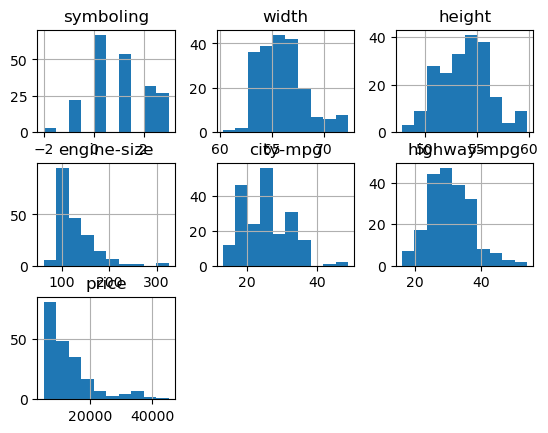

In [12]:
df.hist()

In [13]:
si = SimpleImputer(strategy='median')

In [14]:
df.iloc[:,[1,11]]

,normalized-losses,horsepower
0,NaN,111
1,NaN,111
2,NaN,154
3,164,102
4,164,115
...,...,...
200,95,114
201,95,160
202,95,134
203,95,106


In [15]:
df.iloc[:,[1,11]] = si.fit_transform(df.iloc[:,[1,11]])

In [16]:
df.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
body-style           0
drive-wheels         0
engine-location      0
width                0
height               0
engine-type          0
engine-size          0
horsepower           0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [17]:
df

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,115.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27,13495
1,3,115.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27,16500
2,1,115.0,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154.0,19,26,16500
3,2,164.0,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102.0,24,30,13950
4,2,164.0,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115.0,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,sedan,rwd,front,68.9,55.5,ohc,141,114.0,23,28,16845
201,-1,95.0,volvo,gas,sedan,rwd,front,68.8,55.5,ohc,141,160.0,19,25,19045
202,-1,95.0,volvo,gas,sedan,rwd,front,68.9,55.5,ohcv,173,134.0,18,23,21485
203,-1,95.0,volvo,diesel,sedan,rwd,front,68.9,55.5,ohc,145,106.0,26,27,22470


In [19]:
df.select_dtypes([int,float])

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,115.0,64.1,48.8,130,111.0,21,27,13495
1,3,115.0,64.1,48.8,130,111.0,21,27,16500
2,1,115.0,65.5,52.4,152,154.0,19,26,16500
3,2,164.0,66.2,54.3,109,102.0,24,30,13950
4,2,164.0,66.4,54.3,136,115.0,18,22,17450
...,...,...,...,...,...,...,...,...,...
200,-1,95.0,68.9,55.5,141,114.0,23,28,16845
201,-1,95.0,68.8,55.5,141,160.0,19,25,19045
202,-1,95.0,68.9,55.5,173,134.0,18,23,21485
203,-1,95.0,68.9,55.5,145,106.0,26,27,22470


In [20]:
cat_cols = df.select_dtypes(object).columns
cat_cols

Index(['make', 'fuel-type', 'body-style', 'drive-wheels', 'engine-location',
       'engine-type'],
      dtype='object')

In [21]:
oe = OrdinalEncoder()

df[cat_cols] = oe.fit_transform(df[cat_cols])

In [22]:
df

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,115.0,0.0,1.0,0.0,2.0,0.0,64.1,48.8,0.0,130,111.0,21,27,13495
1,3,115.0,0.0,1.0,0.0,2.0,0.0,64.1,48.8,0.0,130,111.0,21,27,16500
2,1,115.0,0.0,1.0,2.0,2.0,0.0,65.5,52.4,5.0,152,154.0,19,26,16500
3,2,164.0,1.0,1.0,3.0,1.0,0.0,66.2,54.3,3.0,109,102.0,24,30,13950
4,2,164.0,1.0,1.0,3.0,0.0,0.0,66.4,54.3,3.0,136,115.0,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,21.0,1.0,3.0,2.0,0.0,68.9,55.5,3.0,141,114.0,23,28,16845
201,-1,95.0,21.0,1.0,3.0,2.0,0.0,68.8,55.5,3.0,141,160.0,19,25,19045
202,-1,95.0,21.0,1.0,3.0,2.0,0.0,68.9,55.5,5.0,173,134.0,18,23,21485
203,-1,95.0,21.0,0.0,3.0,2.0,0.0,68.9,55.5,3.0,145,106.0,26,27,22470


In [23]:
df.dtypes

symboling              int64
normalized-losses    float64
make                 float64
fuel-type            float64
body-style           float64
drive-wheels         float64
engine-location      float64
width                float64
height               float64
engine-type          float64
engine-size            int64
horsepower           float64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

# Model building

In [24]:
x = df.iloc[:,:-1]
y = df['price']

In [25]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3, random_state=1)

In [26]:
lr = LinearRegression()
lr.fit(xtrain,ytrain)
ypred = lr.predict(xtest)

In [27]:
lr.intercept_

-64935.1135797824

In [28]:
lr.coef_

array([ 5.71727164e+01,  4.76320989e-01, -2.01309566e+02, -6.22705136e+02,
       -1.63712110e+02,  1.88863899e+03,  1.63884484e+04,  7.90632094e+02,
        3.61221503e+02,  2.81207534e+02,  9.82290864e+01, -1.06474945e+01,
        3.08435166e+02, -4.17126915e+02])

In [29]:
lr.score(xtrain,ytrain), lr.score(xtest,ytest)

(0.8504229026078213, 0.7964854785429523)

# Lasso

In [30]:
l1 = Lasso()
l1.fit(xtrain,ytrain)
l1.score(xtrain,ytrain), l1.score(xtest,ytest)

(0.8504215478243033, 0.7966615211575689)

In [31]:
l1.coef_

array([ 5.70766693e+01,  4.67141700e-01, -2.01139953e+02, -6.14206970e+02,
       -1.64751649e+02,  1.88558824e+03,  1.63181959e+04,  7.88680118e+02,
        3.61783500e+02,  2.81248690e+02,  9.83193653e+01, -1.05310631e+01,
        3.07274772e+02, -4.15725804e+02])

# Hyperparameter Tuning

In [34]:
for i in range(100,200):
    l1 = Lasso(alpha=i)
    l1.fit(xtrain,ytrain)
    print(f"Alpha: {i} Train : {l1.score(xtrain,ytrain)} Test: {l1.score(xtest,ytest)}")

Alpha: 100 Train : 0.8372483974026499 Test: 0.8092040910955615
Alpha: 101 Train : 0.8369899229541409 Test: 0.8092979610738256
Alpha: 102 Train : 0.8367288785613758 Test: 0.8093910017461713
Alpha: 103 Train : 0.8364651676681871 Test: 0.8094832684251523
Alpha: 104 Train : 0.8361989818307348 Test: 0.809574650362481
Alpha: 105 Train : 0.8359302253870347 Test: 0.8096652035299013
Alpha: 106 Train : 0.8356588978359675 Test: 0.8097549282309101
Alpha: 107 Train : 0.8353849991129143 Test: 0.8098438245155561
Alpha: 108 Train : 0.8351084257059384 Test: 0.8099319454841268
Alpha: 109 Train : 0.8348293842179736 Test: 0.8100191840285436
Alpha: 110 Train : 0.8345477714936768 Test: 0.8101055942385992
Alpha: 111 Train : 0.8342635877040373 Test: 0.8101911760417996
Alpha: 112 Train : 0.8339767222137543 Test: 0.8102759813628974
Alpha: 113 Train : 0.8336873954613211 Test: 0.8103599056262563
Alpha: 114 Train : 0.8333954973355284 Test: 0.8104430016665038
Alpha: 115 Train : 0.8331010276993127 Test: 0.8105252695

In [35]:
l1 = Lasso(alpha=175)
l1.fit(xtrain,ytrain)
l1.score(xtrain,ytrain), l1.score(xtest,ytest)

(0.8107234361496892, 0.8139459609474126)

In [36]:
l1.coef_

array([  26.15091464,   -0.        , -173.02547787,   -0.        ,
       -363.80743898, 1247.84193718, 3867.709301  ,  391.04314711,
        451.57194036,  297.35122938,  113.32977728,   11.00742675,
         70.90090498, -160.35202828])

# Ridge 

In [37]:
l2 = Ridge()

l2.fit(xtrain,ytrain)
l2.score(xtrain,ytrain), l2.score(xtest,ytest)

(0.8435840853399225, 0.8075632224690532)

In [38]:
for i in range(1,100):
    l2 = Ridge(alpha=i)
    l2.fit(xtrain,ytrain)
    print(f"Alpha: {i} Train: {l2.score(xtrain,ytrain)} Test: {l2.score(xtest,ytest)}")

Alpha: 1 Train: 0.8435840853399225 Test: 0.8075632224690532
Alpha: 2 Train: 0.8356695734845094 Test: 0.8112192014374253
Alpha: 3 Train: 0.8296379623431073 Test: 0.8129299663310143
Alpha: 4 Train: 0.8250699092246865 Test: 0.8138839096972442
Alpha: 5 Train: 0.8215093087765016 Test: 0.8144682684596011
Alpha: 6 Train: 0.8186486103834848 Test: 0.814843562726523
Alpha: 7 Train: 0.816288257302081 Test: 0.8150880725612083
Alpha: 8 Train: 0.8142964263180523 Test: 0.815244730507158
Alpha: 9 Train: 0.8125835227290971 Test: 0.8153392574436444
Alpha: 10 Train: 0.8110868722186455 Test: 0.8153881483263247
Alpha: 11 Train: 0.8097614513602517 Test: 0.8154025610279506
Alpha: 12 Train: 0.8085741366835051 Test: 0.815390369370157
Alpha: 13 Train: 0.8075000372738094 Test: 0.8153573212892009
Alpha: 14 Train: 0.8065200924084595 Test: 0.8153077294072231
Alpha: 15 Train: 0.8056194580416448 Test: 0.8152449025615432
Alpha: 16 Train: 0.8047863980733031 Test: 0.815171426484327
Alpha: 17 Train: 0.8040115065187472 Te

In [39]:
l2 = Ridge(alpha=7)
l2.fit(xtrain,ytrain)
l2.score(xtrain,ytrain),l2.score(xtest,ytest)

(0.816288257302081, 0.8150880725612083)

In [40]:
l2.coef_

array([ 2.31139279e+02, -3.29204695e+00, -1.90126861e+02, -1.01249352e+03,
       -6.04047656e+02,  1.71736131e+03,  3.40160377e+03,  3.91530395e+02,
        5.57861287e+02,  5.13867686e+02,  1.02968876e+02,  2.01227011e+01,
        2.13425523e+02, -2.79915768e+02])

# Elastic Net

In [41]:
en = ElasticNet()
en.fit(xtrain,ytrain)
en.score(xtrain,ytrain), en.score(xtest,ytest)

(0.7866253599240466, 0.809826481725613)